# MA934 Numerical Methods - Workbook 3

If you haven't already done so, install the DualNumbers Julia package. It is a good idea to update all your packages first. The commands are

>Pkg.update()

>Pkg.add("DualNumbers")

but you only need to run them once. 

## Question 1: Numerical differentiation

**1))** Derive a finite difference formula for the derivative of a function, $f$ at a point $x$ using the 3-point stencil $(x, x+h, x+2h)$ and state the order of the approximation error in terms of $h$.

**2)** Write a formula for the derivative, $f^\prime(x)$, of the function

$$f(x) = \sin(\exp(x)) $$

and evaluate it at $x=1$.

**3)** Use your finite difference formula to approximate the value of $f^\prime(1)$ for values of $h$ decreasing from $2^{-1}$ to $2^{-30}$ in powers of $2$. Plot the error as a function of $h$ and verify the theoretically predicted scaling of the error with $h$. What is the best relative error you can achieve?

**4)** Read the examples at https://github.com/JuliaDiff/DualNumbers.jl. Define a dual number $x = 1+\epsilon$ and use it to evaluate $f^\prime(1)$. Verify that the answer is accurate to within machine precision.

1)

Using Taylor series:

\begin{align}
f(x+h)&=f(x)+hf'(x)+\frac{h^2}{2}f''(x)+O(h^3) \\
f(x+2h)&=f(x)+2hf'(x)+2h^2f''(x)+O(h^3)
\end{align}

Then 

Eqn
$$a_1f(x)+a_2f(x+h)+a_3f(x+2h)=(a_1+a_2+a_3)f(x)+(a_1+2a_3)hf'(x)+(\frac{1}{2}a_2+2a_3)hf''(x)+O(h^3).$$

Solving

\begin{align}
a_1+a_2+a_3 &= 0 \\
a_2+2a_3 &= 1 \\
\frac{1}{2}a_2 +2a_3&=0 \\
\end{align}

gives $a_1=-\frac{3}{2}$, $a_2=2$ and $a_3=-\frac{1}{2}$ and then rearranging Eqn gives 

$$ f'(x) = \frac{ -\frac{3}{2}f(x) + 2f(x+h)-\frac{1}{2} f(x+2h)}{h} +O(h^2) $$ so the finite difference formula for $f'$ is 

$$ f'_{i} = \frac{ -\frac{3}{2}f_i + 2f_{i+1}-\frac{1}{2} f_{i+2}}{h}+O(h^2)$$

where $x_i=x_i+h$ and $f_i=f(x_i)$ with approximation error $O(h^2)$.


2)

$$f(x)=\sin(\exp(x)).$$ Then $$f'(x)=e^x\cos(e^x)$$ and so $$f'(1)=e\cos(e) \approx -2.478349732955235.$$

3)

In [16]:
using PyPlot
using DualNumbers

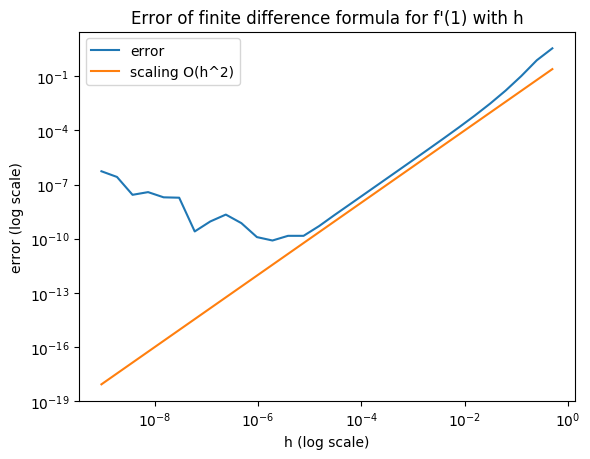

PyObject <matplotlib.legend.Legend object at 0x7f3fdcb76bd0>

In [20]:

f(x)=sin(exp(x))


function numdif(x,h)
    fs=(-3/2*f(x)+2*f(x+h)-1/2*f(x+2*h))/h
    return fs
end

a=zeros(30)

h=zeros(30)

for k=1:30
    a[k]=numdif(1,2.0^-k)
    h[k]=2.0^-k
end

b=e*cos(e)*ones(30)

error=abs(a-b)

scaling=h.^2

loglog(h,error,label="error")
loglog(h,scaling,label="scaling O(h^2)")
xlabel("h (log scale)")
ylabel("error (log scale)")
title("Error of finite difference formula for f'(1) with h")
legend()


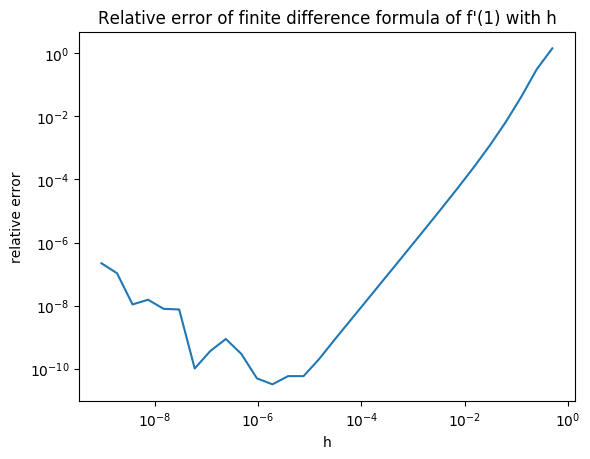

(3.2358031082852225e-11,19)

In [21]:
relative_error=abs(error./b)
loglog(h,relative_error)
xlabel("h")
ylabel("relative error")
title("Relative error of finite difference formula of f'(1) with h")
findmin(relative_error)

Implies the best relative error is $3.2358031082852225 \times 10^{-11}$  which occurs when $h=2^{-19}$.

4)

In [18]:
x=Dual(1,1)
y=f(x)
println("f'(1) = ", dualpart(y))
error=abs(e*cos(e)-dualpart(y))
println("error = ",error)

f'(1) = -2.478349732955235
error = 0.0


error $0.0$ implies within machine precision.